## DFT, some considerations and tricks to remember

**This notebook shows a few tricks for plotting the DFT coefficients versus frequency**

Mauricio D Sacchi\
University of Alberta\
GEOPH 526\
October 2021



In [60]:
using PyPlot, FFTW, Printf


In [76]:
# First I will write my own DFT and iDFT 

function My_DFT(x)
    # Input is a time series x and output is its DFT X
    
    N = length(x);
    
    X = zeros(ComplexF64,N)
   
        for iw = 1:N
          wrad = 2.0*pi*(iw-1)/N
           for ix = 1:N
            X[iw]= X[iw] + x[ix]*exp(-im*wrad*(ix-1))
        end
    end
return X
end

function My_IDFT(x)
    # Input are DFT coefficients X and output is the signal x
    
    N = length(x);
    
    X = zeros(ComplexF64,N)
   
        for iw = 1:N
          wrad = -2.0*pi*(iw-1)/N
           for ix = 1:N
            X[iw]= X[iw] + x[ix]*exp(-im*wrad*(ix-1))
        end
    end
return X/N
end



My_IDFT (generic function with 1 method)

# Test DFT and iDFT 

In [77]:

# Evaluate a time domain signal s[n],n=1,N (Lenght N)

 N = 100 
 t =  0.004*collect(0:1:N-1); 
 s = sin.(2*pi*t*10.0).*exp.(-20*t)

# Nf is the desired number of frequencies

 Nf = 256 

# Padd with zeros the signal s[n]

sp  = vcat(s,zeros(Nf-N))

# Compute the DFT 

 S   = My_DFT(sp)

# Reurn to time to check that DFT and iDFT are working

 sr  = My_IDFT(S)

# Compare orignal signal to reconstructed signal via DFT

e = sp-sr
error = e'*e

println("error:", error)




error:2.904573847287065e-27 + 0.0im


# How to make proper frequency axes for real series

### Version 1:

- Not the best way of plotting because the signal is real and Nf/2+1 frequencies are sufficient to visualize the DFT


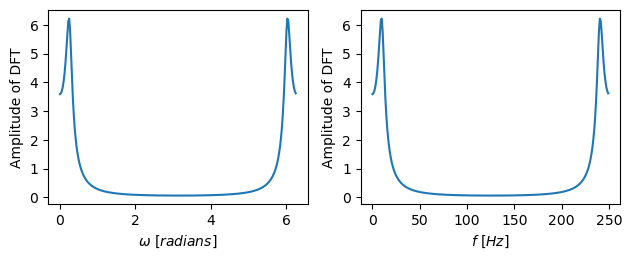

In [94]:
# I have computed S,  DFT od s. It is a vector of Nf elements and now I would like to plot it. 
# Let's consider ploting the amplitude of the DFT coefficients vs radians and Herz

# sampling interval in seconds 

dt = 0.004

# axis in rads in [0,2*pi)

wrad = (2.0*pi/Nf)*collect(0:Nf-1)

# axis in Hz in [0,f_nyquist]

f = wrad/(2*pi*dt)

subplot(221); plot(wrad,abs.(S)); 
xlabel(L"\omega\,\, [radians]"); ylabel("Amplitude of DFT")
subplot(222); plot(f,abs.(S)); 
xlabel(L"f\,\,  [Hz]"); ylabel("Amplitude of DFT")

tight_layout()

### Version 2: 
- This is the preferred way of plotting the DFT for a real series, I will plot the Nf/2+1 positive frequencies

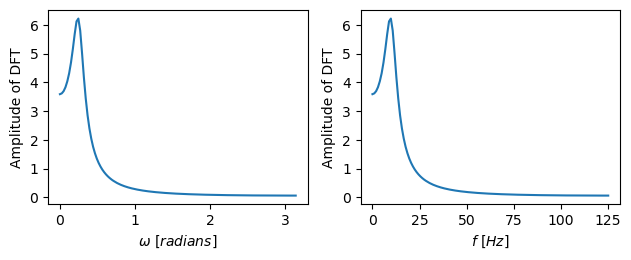

In [95]:
# I have computed S the DFT of Nf points and now I would like to plot it. 
# Let's consider ploting the DFT amplitude vs radians and herz

dt = 0.004

# axis in rads in [0,pi]

 N2 = convert(Int, Nf/2)
wrad = (2.0*pi/Nf)*collect(0:N2)

# axis in Hz in [0,f_nyquist]

f = wrad/(2*pi*dt)

subplot(221); plot(wrad,abs.(S[1:N2+1])); 
xlabel(L"\omega\,\, [radians]"); ylabel("Amplitude of DFT")
subplot(222); plot(f,abs.(S[1:N2+1])); 
xlabel(L"f\,\,  [Hz]"); ylabel("Amplitude of DFT")

tight_layout()

### Version 3: 

- Plot both positive and negative frequencies 

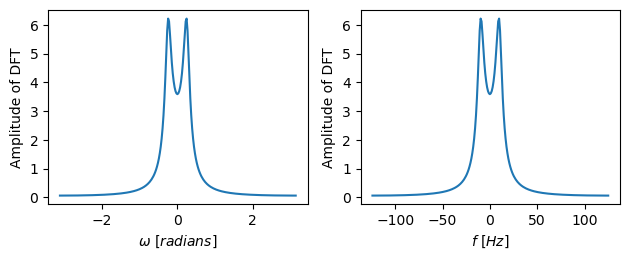

In [107]:
# Plotting the full freq. axis in (-pi,pi] is more tricky because the DFT coefficients returned by the FFT
# are given in the interval [0, 2pi) ... Matlab uses fftship which is basically what I am doing below

# Get DFT samples in [0,pi) --> 1: Nf/2+1

XP = S[1:N2+1]

# Get DFT samples in (pi,2pi)--> Nf/2+2 : Nf

XN= S[N2+2:Nf]

# We now join the amplitudes associated to neg and positive freqs into X_centered (DFT centered)

S_centered = vcat(XN, XP)

# Now I compute the axis in (-pi, pi]

wrad = (2.0*pi/Nf)*collect(-N2+1:N2)

# axis in Hz in (-f_nyquist,f_nyquist]

f = wrad/(2*pi*dt)

# Now we can plot


subplot(221); plot(wrad,abs.(S_centered)); 
xlabel(L"\omega\,\, [radians]"); ylabel("Amplitude of DFT")
subplot(222); plot(f,abs.(S_centered)); 
xlabel(L"f\,\,  [Hz]"); ylabel("Amplitude of DFT")

tight_layout()



In [115]:
# Extract around the center of the DFT  to be sure that symmetries are ok.  Now the 
# zero freq. is at N-1 = Nf/2+1-1 = Nf/2.
# Please, see part of the output to confirm you got conjugate symmetry around w=0rads

for k = -4:4
 @printf("k: %3d, w (rad): %5.2f, X(w):%7.3f %7.3f\n",k,wrad[N2+k],real(S_centered[N2+k]), imag(S_centered[N2+k]) )
        end 

k:  -4, w (rad): -0.10, X(w):  3.904   1.029
k:  -3, w (rad): -0.07, X(w):  3.769   0.695
k:  -2, w (rad): -0.05, X(w):  3.671   0.433
k:  -1, w (rad): -0.02, X(w):  3.613   0.206
k:   0, w (rad):  0.00, X(w):  3.591   0.000
k:   1, w (rad):  0.02, X(w):  3.613  -0.206
k:   2, w (rad):  0.05, X(w):  3.671  -0.433
k:   3, w (rad):  0.07, X(w):  3.769  -0.695
k:   4, w (rad):  0.10, X(w):  3.904  -1.029
